# DSCI 512 Lecture 2


In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict

import altair as alt

Outline:

- Linear search and binary search intro (15 min)
- Code timings (15 min)
- Sorting (10 min)
- Break (5 min)
- Hash tables, hash functions (15 min)
- Lookup tables, Python `dict` (5 min)
- T/F questions (15 min)

## Linear search and binary search intro (15 min)

We return to the problem of checking whether an element is present in a collection.

#### Linear search

In [2]:
def search_unsorted(data, key):
    """
    Searches the key in data using linear search 
    and returns True if found and False otherwise. 

    Parameters
    ----------
    data : list
           the elements to search within
    key  : int
           the key to search for

    Returns
    -------
    bool
        boolean if key is contained in the data 

    Examples
    --------
    >>> search_unsorted([1, 7, 67, 35, 45], 3)
    False
    >>> search_unsorted([1, 7, 67, 35, 45], 7)
    True
    """

    for element in data:
        if element == key:
            return True
    return False

In [3]:
# Some tests

# key is the first element in the list
assert search_unsorted([4, 7, 9, -12, 1000], 4)

# key is the last element in the list
assert search_unsorted([4, 7, 9, -12, 1000], 1000)

# key occurs multiple times in the list
assert search_unsorted([4, 7, 9, -12, 4, 1000], 4)

# key is larger than the largest element in the list
assert not search_unsorted([4, 7, 9, -12, 1000], 2000)

# key is smaller than the smallest element in the list
assert not search_unsorted([4, 7, 9, -12, 1000], -18)

# nothing is in an empty list
assert not search_unsorted([], 1)

**Question:** What is the time complexity of the `search_unsorted`, as a function of the length of the list, $n$? 

<br><br><br><br><br><br><br><br> 
**Answer:** The time complexity of the `search_unsorted` function is $O(n)$ because in the worst case the function loops over $n$ elements. 

#### Binary search

- If the list is already sorted, we can search much faster with _binary search_.
- See the "binary search video" that was assigned as pre-class viewing. 
- We start in the middle and can just restrict ourselves to searching half the list after a comparison.
- Note: the input list must be sorted for the code to work.

In [6]:
def search_sorted(data, key):
    """
    Searches the key in data using binary search 
    and returns True if found and False otherwise. 

    Parameters
    ----------
    data : list
           a list of sorted elements to search within
    key  : int
           the key to search for

    Returns
    -------
    bool :
        boolean if key is contained in the data 

    Examples
    --------
    >>> search_sorted([1, 7, 35, 45, 67], 3)
    False
    >>> search_sorted([1, 7, 35, 45, 67], 7)
    True
    """
    
    low = 0
    high = len(data) - 1
    while (low <= high):
        mid = (high + low)//2
        if data[mid] == key:
            return True
        if key < data[mid]:
            high = mid - 1
        else:
            low = mid + 1
    return False

In [7]:
data = [-12, 4, 7, 9, 45, 45, 987, 1000, 2000]

In [8]:
# Test cases for binary search

# key is the first element in the list
assert search_sorted(data, -12) == True

# key is the last element in the list
assert search_sorted(data, 2000) == True

# key occurs multiple times in the list
assert search_sorted(data, 45) == True

# key is larger than the largest element in the list
assert search_sorted(data, 3000) == False

# key is smaller than the smallest element in the list
assert search_sorted(data, -18) == False

# nothing is in an empty list
assert search_unsorted([], 1) == False

**Question:** What is the time complexity of the `search_sorted`, as a function of the length of the list, $n$? 

<br><br><br><br><br><br><br><br> **Answer:** The time complexity of the `search_sorted` function is $O(\log n)$ because in the worst case, the function loops over $\log n$ elements, as the search space reduces by half in each iteration of the loop. 

**Question:** What happens if you call `search_unsorted` on sorted data? What happens if you call `search_sorted` on unsorted data?

<br><br><br><br><br><br> **Answer:** The `search_unsorted` function does not care about whether the data is sorted or not. In both cases, it sequentially searches for the key and returns `True` when it is found. The `search_sorted` function, on the other hand, is based on the assumption that the data is sorted in ascending order and you might miss the element you are looking for if called on unsorted data. In binary search, whenever we are in a position, all elements on the left are less than (or equal to in cases where values occur multiple times in the data) the element at the position and all elements on the right are greater than the element at the position, which is helpful in deciding which part of the list the next search should happen.   

For example:

In [9]:
search_sorted([3, 2, 1], 1)

False

**Question:** Why doesn't the `search_sorted` function start by verifying that the list is indeed sorted?

<br><br><br><br><br><br>
**Answer:** because this would take $O(n)$ time, defeating the purpose of the $O(\log\, n)$ lookup.

## Code timing (15 min)

Below we empirically measure the running times of `search_unsorted` and `search_sorted`. 

**Question:** Why do I search for $-1$ in the code below? Why not $1$?

In [10]:
list_sizes = [100, 1000, 10000, 100000, 1_000_000, 10_000_000]

results = defaultdict(list)
results["size"] = list_sizes

key = -1

for list_size in list_sizes:
    print('List size: ', list_size)
    x = np.random.randint(1e8, size=list_size)

    time = %timeit -q -o -r 1 search_unsorted(x, key)
    results["Unsorted list linear"].append(time.average)
    # Note: -q prevents it from printing to the terminal
    #       -o sends the result to a variable (average time in seconds)
    #       -r 3 makes it average only 3 trials instead of the default of 7, which saves time

    time = %timeit -q -o -r 1 (key in x)
    results["Unsorted list in"].append(time.average)

    x.sort()
    time = %timeit -q -o -r 1 search_sorted(x, key)
    results["Sorted list binary"].append(time.average)

    x_set = set(x)
    time = %timeit -q -o -r 1 (key in x_set)
    results["Python set in"].append(time.average)

List size:  100
List size:  1000
List size:  10000
List size:  100000
List size:  1000000
List size:  10000000


**Answer**: we search for -1 because we know it will not be in the array. This gives us a worst case timing, because searching is the slowest  if it has to keep looking; it can be faster if it finds something right away. For example, if it's the 1st element, then linear search would seem extremely fast.

In [11]:
df = pd.DataFrame(results, columns=list(results.keys()))
df

,size,Unsorted list linear,Unsorted list in,Sorted list binary,Python set in
0,100,0.000025,0.000003,0.000005,6.218528e-08
1,1000,0.000681,0.000004,0.000008,6.098954e-08
2,10000,0.002732,0.000009,0.000011,5.861086e-08
3,100000,0.026532,0.000057,0.000014,5.829067e-08
4,1000000,0.254848,0.000800,0.000016,6.033430e-08
5,10000000,2.616215,0.010373,0.000021,6.518929e-08


Are these consistent with the time complexities we expected?

Reading runtimes from a table: what happens of $N$ becomes $10N$?

- Linear: time $T$ goes up to $10T$
- Logarithmic: time $T$ goes up to $T+\Delta T$
- Constant: time $T$ stays about the same

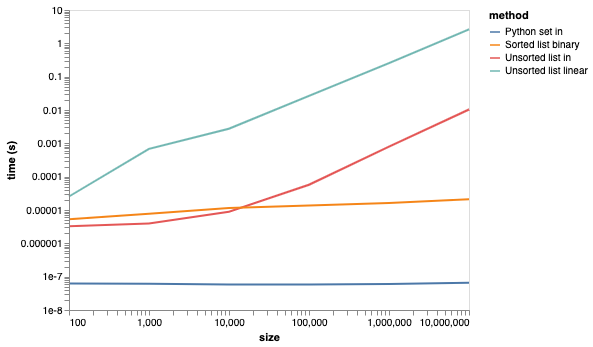

In [12]:
df_long = pd.melt(df, id_vars="size", var_name="method", value_name="time (s)")

alt.Chart(df_long).mark_line().encode(
    alt.X('size', scale=alt.Scale(type='log')),
    alt.Y('time (s)', scale=alt.Scale(type='log')),
    color='method'
).configure_axis(grid=False)

Note that the `binary_search` we wrote is actually slower than the linear search using `in` when the list is smaller than $10,000$ elements. Remember, big-O is just an "asymptotic" trend. There could be:

- Large/small constants, like $1000\log(n)$ vs. $n$.
- "Lower order terms", like $\log(n)+100 \log \log(n) + 100$ vs. $n$.

We are probably seeing the former; my code performs fewer steps (better complexity), but each step is much slower because the implementation is not optimized. (Often, though, we don't care too much about how code performs for very small inputs.)

(**Note:** the last ~10 minutes of material are not easy and very important. If you didn't completely follow, please review them later and ask questions as needed!)

The two fastest methods (the orange and blue curves) look quite similar. We can compare them on a log plot (time vs. $\log n$) to try and tell the difference.

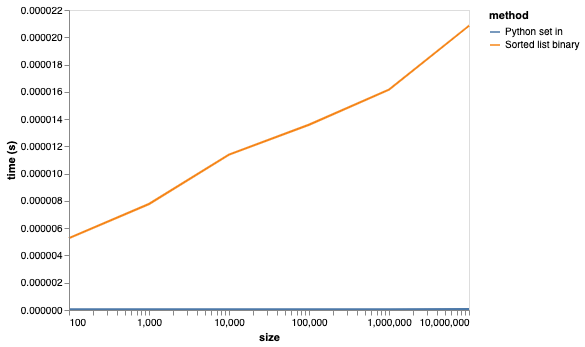

In [13]:
df_long = pd.melt(df[["size", "Sorted list binary", "Python set in"]],
                  id_vars="size", var_name="method", value_name="time (s)")

alt.Chart(df_long).mark_line().encode(
    alt.X('size', scale=alt.Scale(type='log')),
    alt.Y('time (s)'),
    color='method'
).configure_axis(grid=False)


We can see that the set really is constant, but the binary search is logarithmic - in the plot, time is linear in $\log(n)$.

## Sorting (10 min)

- Sorting is a very popular topic in Algorithms and Data Structures courses.
- We'll start with insertion sort.
- This is the same code that we saw last class.

In [ ]:
def insertion_sort(x):
    """Sorts x inplace using insertion sort.

    Parameters
    ----------
    x : list
           the list needed to be sorted

    Returns
    -------
    list :
        the sorted list 

    Examples
    --------
    >>> insertion_sort([7, 1, 67, 35, 45])
    [1, 7, 35, 45, 67]
    >>> insertion_sort([357, 6, 55, 12, 112])
    [6, 12, 55, 112, 357]
    """

    n = len(x)

    for i in range(n):
        # Get the index of the smallest value from location i onward
        min_ind = np.argmin(x[i:]) + i

        # Swap this with element i
        x[i], x[min_ind] = x[min_ind], x[i]
    return x

**Question:** What is the time complexity of this method?

<br><br><br><br><br><br>

**Answer:** $O(n^2)$. `argmin` itself takes $O(n)$, and this is called $n$ times, for a total of $O(n^2)$. The actual number of steps is more like $n^2/2$.

<br>

**Question:** could we find a sorting algorithm that takes $\log(n)$ time?

<br><br><br><br><br><br>

**Answer:** no way, because it takes $n$ steps to even inspect every element of the input!

- The real answer is that the best sorting algorithms are $n \log(n)$ time. This is close enough to $O(n)$ that we should be very happy with the result. 
- If you are interested, you can read more about [mergesort](https://www.geeksforgeeks.org/merge-sort/) and [quicksort](https://www.geeksforgeeks.org/quick-sort/). We may go into this a bit next week.

## Break (5 min)

## Hash tables, hash functions (15 min)


- Python's `set` type supports the following operations in $O(1)$ time:
  - inserting a new element
  - deleting an element
  - checking if an element is present

How could we implement this using the tools we already have?

- Well, what about using linear search to find elements, e.g. a `list`?
  - This is too slow
- What about using binary search?
  - Now searching is fast, but insertion/deletion is slow, because we need to maintain an ordered list
- Enter the [hash table](https://en.wikipedia.org/wiki/Hash_table) - to save the day!
  - Trees could also work (see Lecture 4), but hash tables are the most popular.
  
#### Hash functions

Python objects have a _hash_:

In [14]:
hash("mds")

3539441871722134600

In [15]:
hash("")

0

It looks like the hash function returns an integer.

In [16]:
hash(5.5)

1152921504606846981

In [17]:
hash(5)

5

In [18]:
hash(-9999)

-9999

It looks like the hash function of a Python integer is itself. Or at least small enough integers.

In [19]:
hash(999999999999999999999999)

2003764205207330319

Sometimes it fails?

In [20]:
hash([1, 2, 3])

TypeError: unhashable type: 'list'

In [21]:
hash((1, 2, 3))

2528502973977326415

In [22]:
hash(None)

-9223372036582222714

If a Python `set` is a hash table, that means items in it must be hashable (`dict` has the same requirement, for keys):

In [23]:
s = set()

In [24]:
s.add(5.5)

In [25]:
s.add("mds")

In [26]:
s.add([1, 2, 3])

TypeError: unhashable type: 'list'

In [27]:
s.add((1, 2, 3))

In [28]:
s

{(1, 2, 3), 5.5, 'mds'}

- Typically, mutable objects are not hashable.

#### Hash tables

- So, it looks like the hash function maps from an object to an integer.
- And that Python `set`s use these hash functions.
- How do they work?
- The hash table is basically a list of lists, and the hash function (mod the array size) maps an object to its location in the outer list.
  - But it's a bit more complicated than that.
  - The list typically expands and contracts automatically as needed.
  - These operations may be slow, but averaged or "amortized" over many operations, the runtime is $O(1)$
  - The hash function depends on this array size.
  - There's also an issue of collisions: when two different objects hash to the same place.
- Roughly speaking, we can insert, retrieve, and delete things in $O(1)$ time so long as we have a "good" hash function.
  - The hash function will be "good" for default Python objects, and if you end up needing to implement your own one day you should read a bit more about it.

#### A simple hash table implementation

Below is a (very low-quality) hash table implementation, with only 4 buckets by default:

In [29]:
class HashTable:
    
    def __init__(self, num_buckets=4):
        self.stuff = list() # A list of lists
        self.n = num_buckets
        
        for i in range(num_buckets):
            self.stuff.append([]) # Create the inner lists, one per bucket
        
    def add(self, item):
        if not self.contains(item):
            self.stuff[hash(item) % self.n].append(item)
        
    def contains(self, item):
        return item in self.stuff[hash(item) % self.n]
    
    def __str__(self):
        return str(self.stuff)

(Note: The `hash` function has a random seed that is set at the start of every Python session, so your actual results my vary from mine.)

In [30]:
ht = HashTable()
print(ht)

[[], [], [], []]


- So far, all 4 buckets are empty. 
- Now let's add something:

In [31]:
ht.add("hello")
print(ht)

[[], [], ['hello'], []]


"hello" went into this bucket because 

In [32]:
hash("hello")

-1240784039951095738

In [33]:
hash("hello") % 4

2

Now let's add more things:

In [34]:
ht.add("goodbye")
print(ht)

[[], ['goodbye'], ['hello'], []]


In [35]:
ht.add("test")
print(ht)

[[], ['goodbye'], ['hello'], ['test']]


In [36]:
ht.add("item")
print(ht)

[[], ['goodbye'], ['hello'], ['test', 'item']]


- Above we have a _collision_: that is, 2 items in the same bucket.
- If the main list is able to dynamically grow as the number of items grows, we can keep the number of collisions low.
- This preserves the $O(1)$ operations.

## Lookup tables, Python `dict` (5 min)

- Python's `dict` type is a dictionary (aka symbol table)
- A dictionary should support the following operations:
  - inserting a new element
  - deleting an element
  - finding an element
- It is much like a `set` except the entries, called "keys", now have some data payload associated with them, which we call "values".
- It is also implemented as a hash table, meaning you can expect $O(1)$ operations.
- Only the keys are hashed, so only the keys have to be hashable.
  - A list can be a value, but not a key.

In [37]:
d = dict()
d[5] = "a"
d["b"] = 9
d

{5: 'a', 'b': 9}

In [38]:
5 in d

True

In [39]:
9 in d  # it only searches the keys

False

In [40]:
d[5]

'a'

In [41]:
d[6]

KeyError: 6

Hashable types:

In [43]:
d[[1,2,3]] = 10

TypeError: unhashable type: 'list'

In [45]:
d[10] = [1,2,3] # OK

A reminder of some dictionary syntax:

In [46]:
f = {i: i*2 for i in range(10)}
f

{0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10, 6: 12, 7: 14, 8: 16, 9: 18}

In [47]:
for key, val in f.items():
    print("key =", key, " val =", val)

key = 0  val = 0
key = 1  val = 2
key = 2  val = 4
key = 3  val = 6
key = 4  val = 8
key = 5  val = 10
key = 6  val = 12
key = 7  val = 14
key = 8  val = 16
key = 9  val = 18


Nested dictionaries:

In [48]:
g = dict()
g[5] = f
g

{5: {0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10, 6: 12, 7: 14, 8: 16, 9: 18}}

## T/F questions (15 min)

1. If I have to search inside a list $1000$ times, it is better to first sort the list and then use binary search, rather than just using linear search.
2. The best sorting algorithms run in $O(n \log n)$ time.
3. The elements of a `set` are maintained in sorted order for fast searching.
4. Searching for a key in a `dict` takes $O(1)$ time, but searching for a value takes $O(n)$.
5. If two Python objects have different hashes, then they will end up in different buckets in the hash table.